##### Name - Shunottara Alhat


# Assignment 5 - Q2. Consider only the below columns and prepare a prediction model for predicting Price. (Toyota Corolla)

### Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

  

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stat

In [3]:
Toyota = pd.read_csv("ToyotaCorolla.csv")
Toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


### EDA 

In [4]:
Toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
Toyota1 = pd.concat([Toyota.iloc[:,2:4],Toyota.iloc[:,6:7],Toyota.iloc[:,8:9],
                     Toyota.iloc[:,12:14],Toyota.iloc[:,15:18]],axis=True)
Toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
Toyota2 = Toyota1.rename({"Age_08_04":"Age" , "cc":"CC" , "Quarterly_Tax":"QuarTax"},axis=1)
Toyota2

,Price,Age,KM,HP,CC,Doors,Gears,QuarTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
Toyota2[Toyota2.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QuarTax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [8]:
Toyota3 = Toyota2.drop_duplicates().reset_index(drop = True)
Toyota3

,Price,Age,KM,HP,CC,Doors,Gears,QuarTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [9]:
Toyota3.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QuarTax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


### Correlation Analysis 

In [10]:
Toyota3.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QuarTax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QuarTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


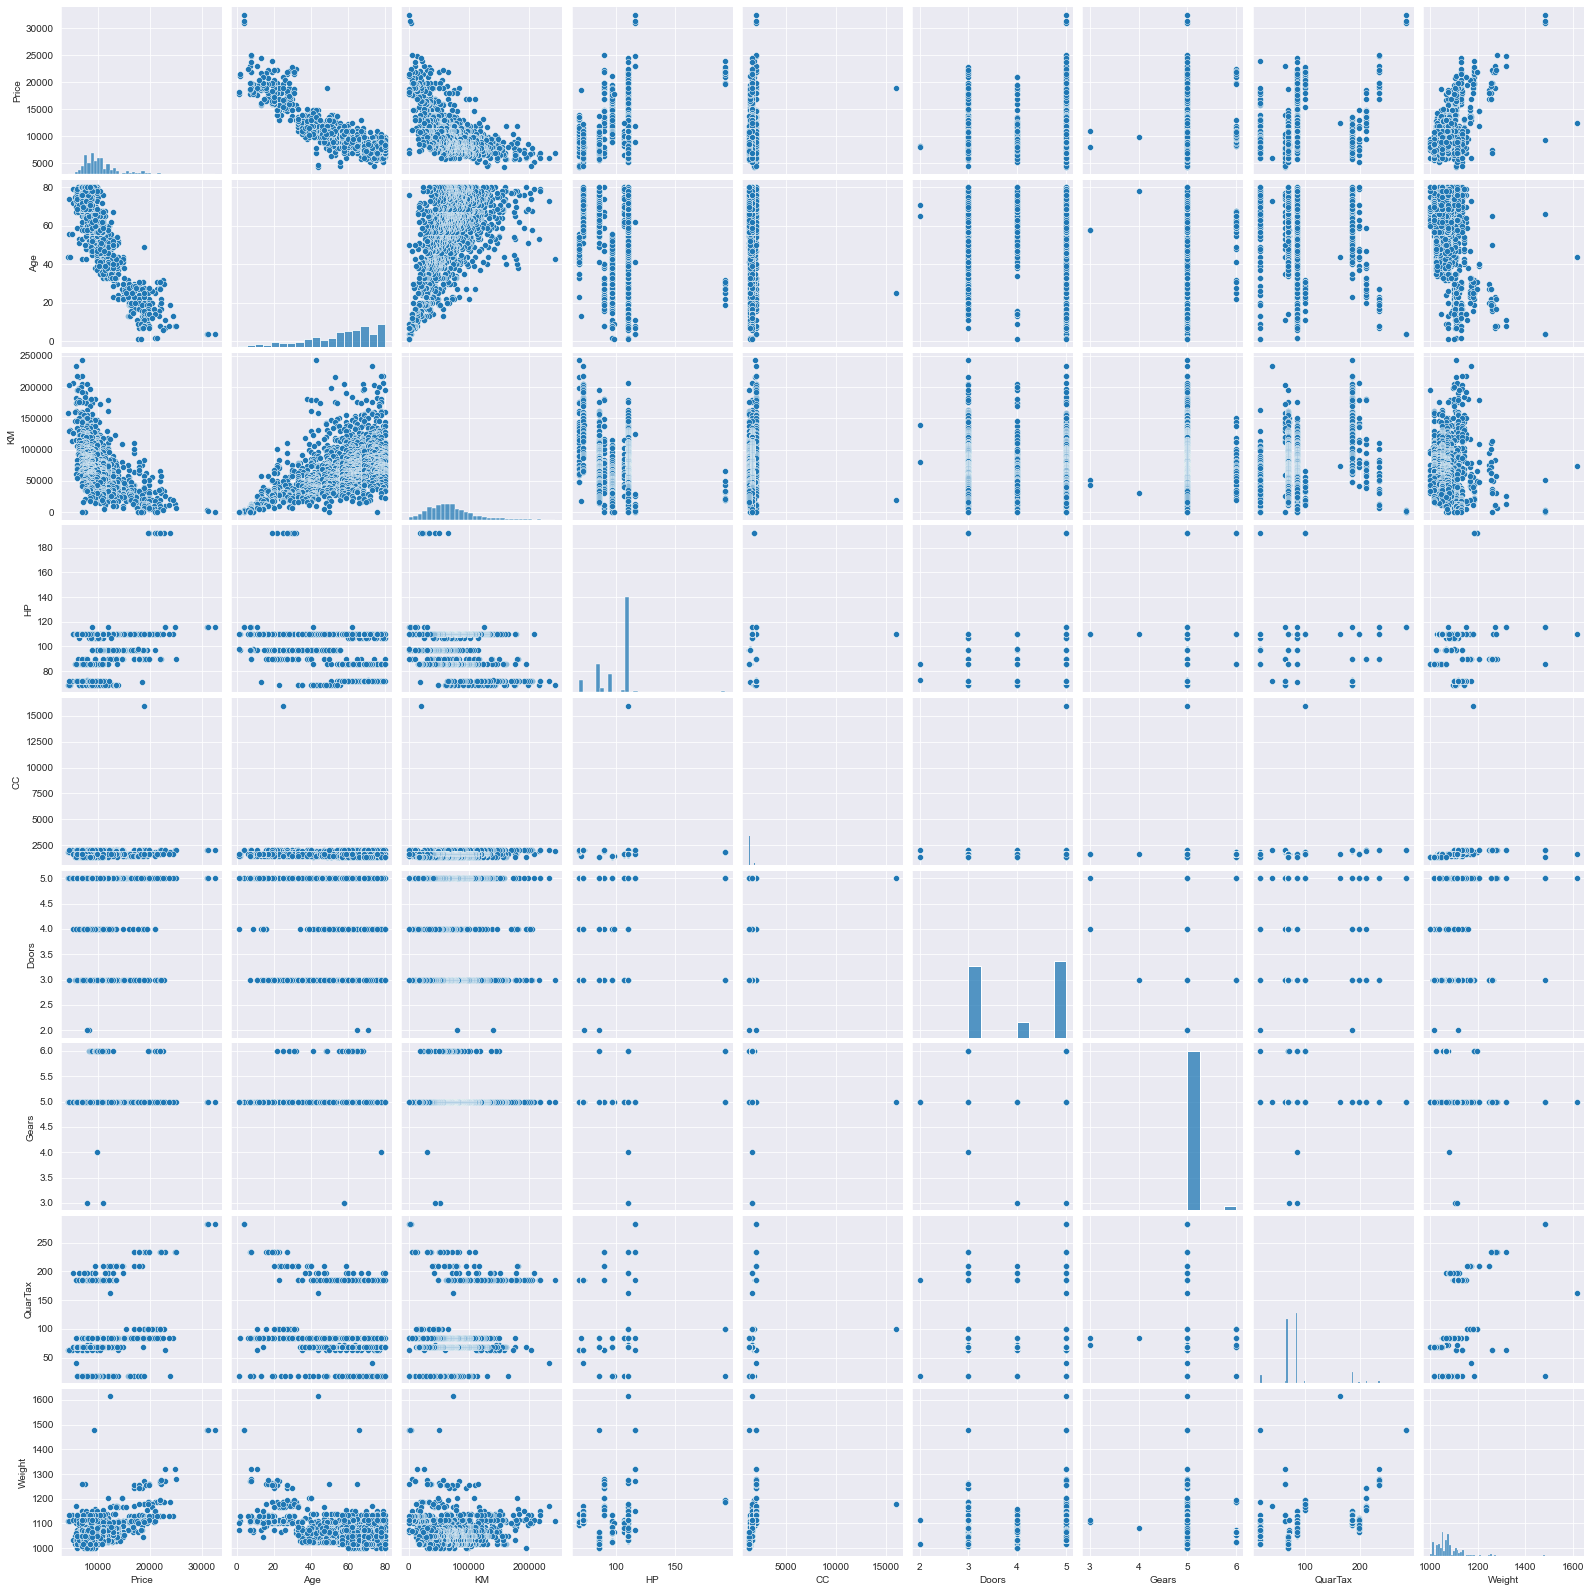

In [11]:
sns.set_style(style = 'darkgrid')
sns.pairplot(Toyota3)

### Model Building 

In [12]:
model = smf.ols('Price ~ Age + KM + HP + CC + Doors + Gears + QuarTax + Weight', data = Toyota3).fit()

In [13]:
discrete_feature = [feature for feature in Toyota3.columns if len(Toyota3[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))                   

Discrete Variables Count: 5


In [14]:
continuous_feature = [feature for feature in Toyota3.columns if Toyota3[feature].dtype != 'o' and feature]
print('Continuous Feature Count: {}'.format(len(continuous_feature)))

Continuous Feature Count: 9


#### LOG 

In [15]:
ml_p=smf.ols('Price ~ Age + KM + HP + CC + Doors + Gears + QuarTax + Weight',data = Toyota3).fit()
print(ml_p.tvalues, '\n', ml_p.pvalues)

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QuarTax       2.944198
Weight       15.760663
dtype: float64 
 Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
CC            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QuarTax       3.290363e-03
Weight        1.031118e-51
dtype: float64


Text(0.5, 1.0, 'Price')

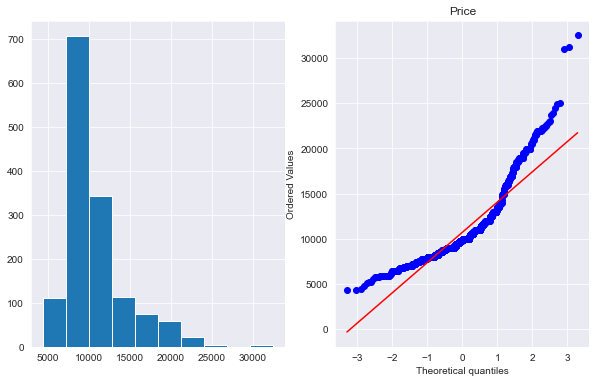

In [16]:

def plot_data(Toyota3,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    Toyota3[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(Toyota3[feature],dist='norm',plot = pylab)


plot_data(Toyota3,'Price')
plt.title('Price')


Text(0.5, 1.0, 'Age')

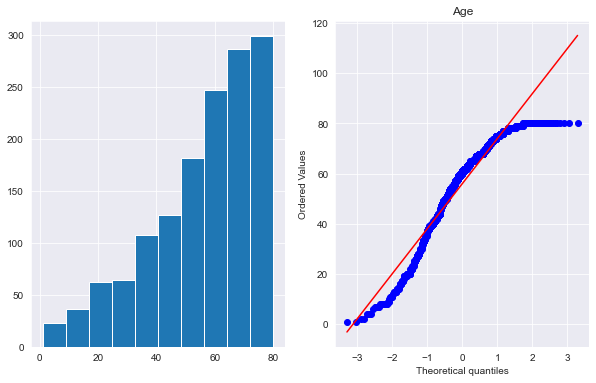

In [17]:
plot_data(Toyota3,'Age')
plt.title('Age')

Text(0.5, 1.0, 'KM')

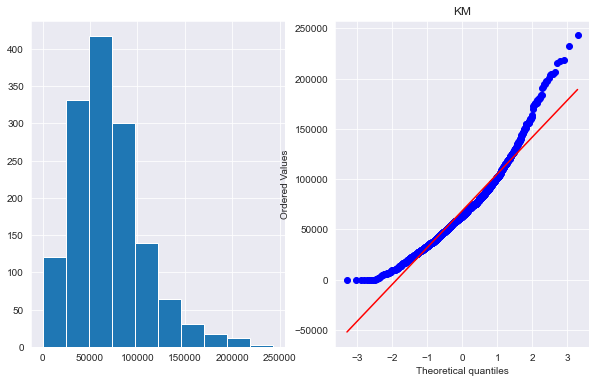

In [18]:
plot_data(Toyota3,'KM')
plt.title('KM')

Text(0.5, 1.0, 'Weight')

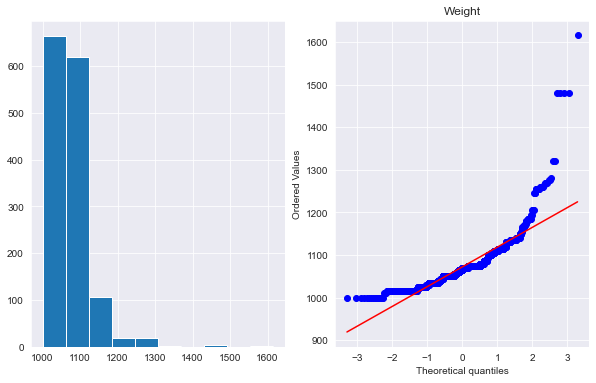

In [19]:
plot_data(Toyota3,'Weight')
plt.title('Weight')

Text(0.5, 1.0, 'Weight')

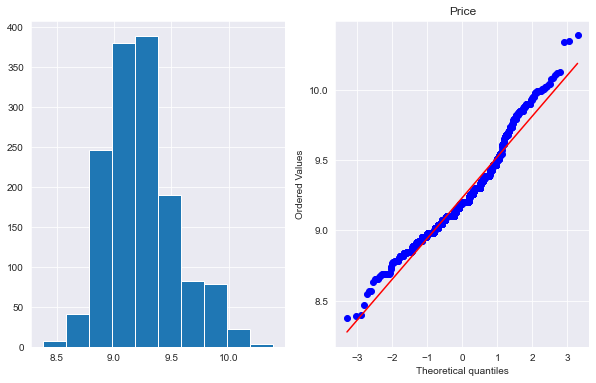

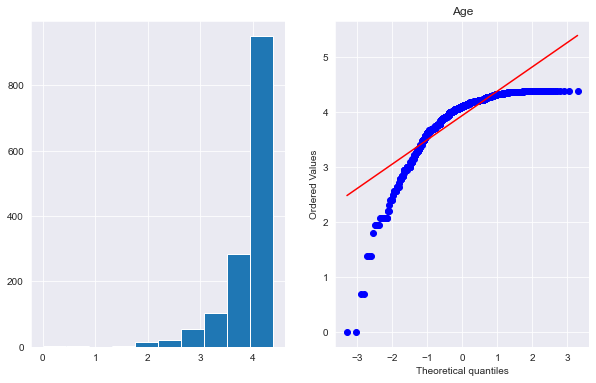

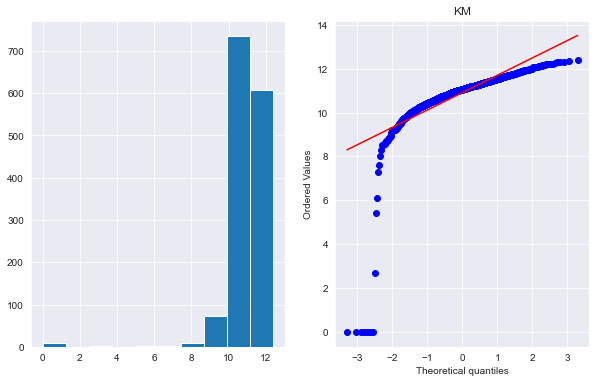

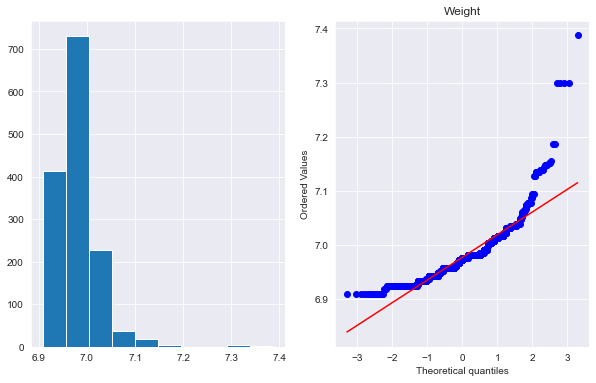

In [20]:
df = Toyota3.copy()
df[continuous_feature] = np.log(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')

plot_data(df,'Age')
plt.title('Age')

plot_data(df,'KM')
plt.title('KM')

plot_data(df,'Weight')
plt.title('Weight')

#### SquareRoot 

Text(0.5, 1.0, 'Weight')

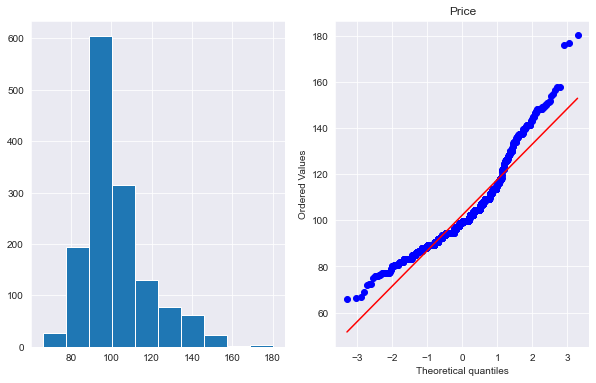

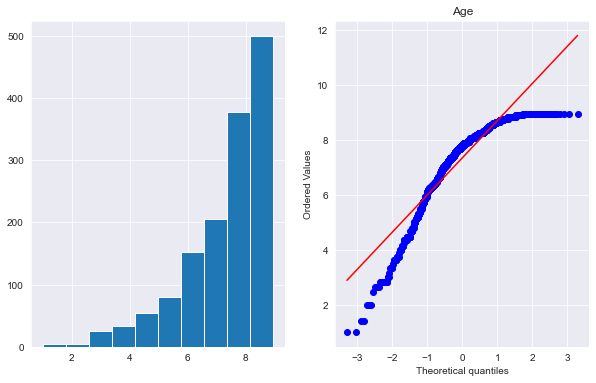

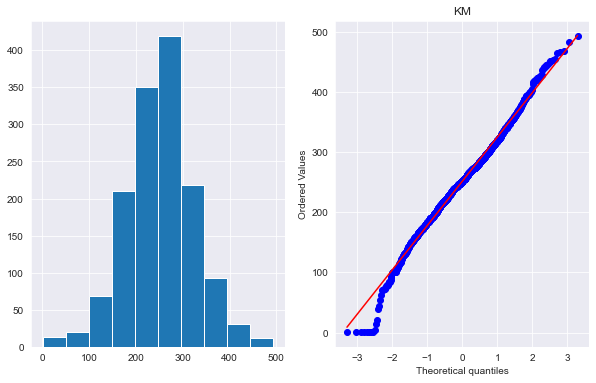

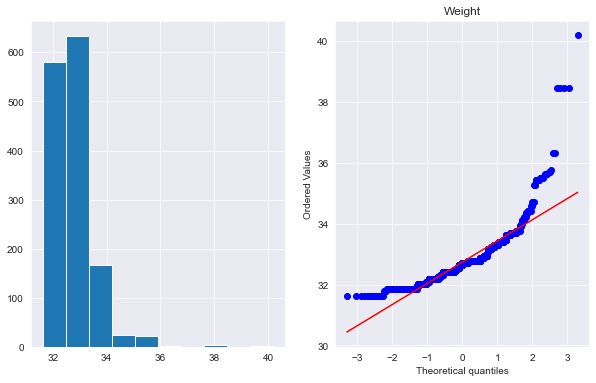

In [21]:
df = Toyota3.copy()
df[continuous_feature] = np.sqrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')

plot_data(df,'Age')
plt.title('Age')

plot_data(df,'KM')
plt.title('KM')

plot_data(df,'Weight')
plt.title('Weight')

#### Square 

Text(0.5, 1.0, 'Weight')

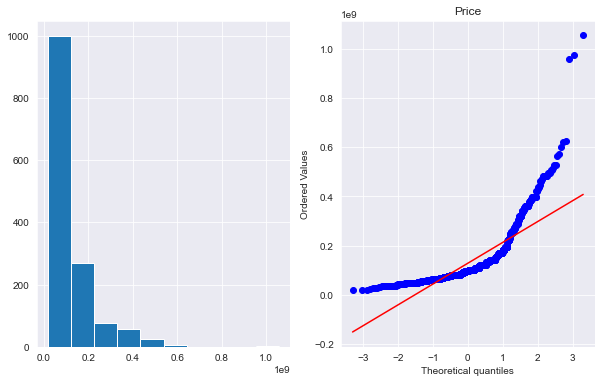

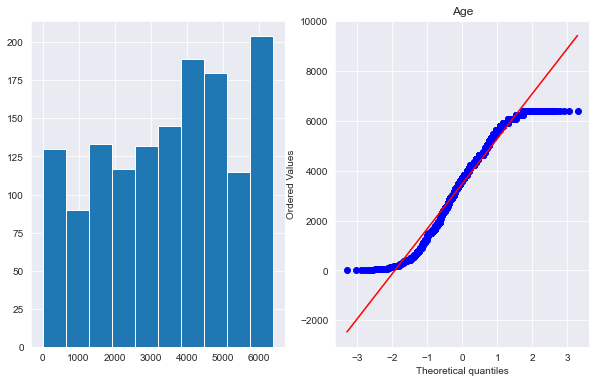

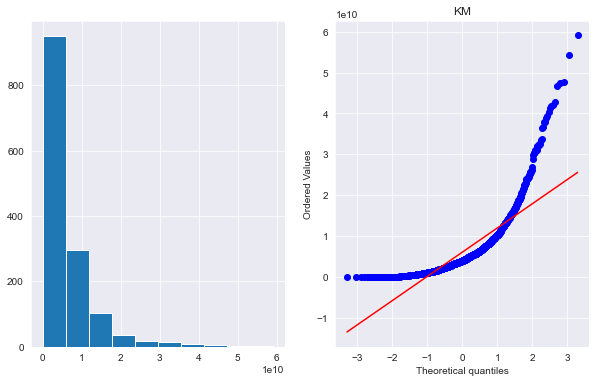

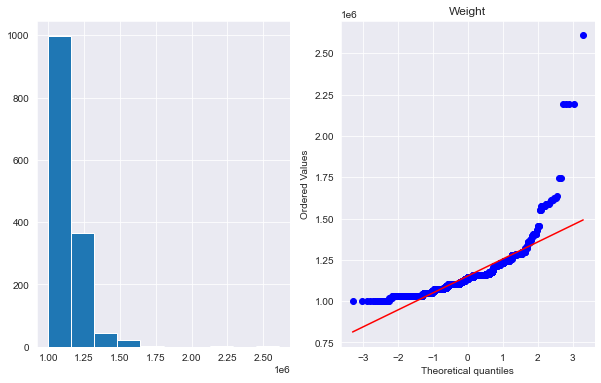

In [22]:
df = Toyota3.copy()
df[continuous_feature] = np.square(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')

plot_data(df,'Age')
plt.title('Age')

plot_data(df,'KM')
plt.title('KM')

plot_data(df,'Weight')
plt.title('Weight')

### Model Testing 

In [23]:
# Finding Coefficient Parameters
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QuarTax         3.858805
Weight         16.855470
dtype: float64

In [24]:
# Finding TValues and PValues
model.tvalues , np.round(model.pvalues,5)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QuarTax       2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QuarTax      0.00329
 Weight       0.00000
 dtype: float64)

In [25]:
# Finding RSquared Values
model.rsquared , model.rsquared_adj 

(0.8625200256947, 0.8617487495415146)

In [26]:
# Build SLR for insignificant variables 'CC' and 'Doors'
slr_c = smf.ols("Price ~ CC", data = Toyota3).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [27]:
slr_d = smf.ols("Price ~ Doors", data = Toyota3).fit()
slr_d.tvalues , slr_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [28]:
mlr_cd = smf.ols("Price ~ CC + Doors", data = Toyota3).fit()
mlr_cd.tvalues , mlr_cd.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

### Model Validation

#### Two Techniques: 1) Collinearity Check & 2) Residual Analysis

In [29]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

Rsq_age = smf.ols("Age ~  KM + HP + CC + Doors + Gears + QuarTax + Weight", data = Toyota3).fit().rsquared
VIF_age = 1/(1-Rsq_age)

Rsq_km = smf.ols("KM ~  Age + HP + CC + Doors + Gears + QuarTax + Weight", data = Toyota3).fit().rsquared
VIF_km = 1/(1-Rsq_km)

Rsq_hp = smf.ols("HP ~  Age + KM + CC + Doors + Gears + QuarTax + Weight", data = Toyota3).fit().rsquared
VIF_hp = 1/(1-Rsq_hp)

Rsq_cc = smf.ols("CC ~  Age + KM + HP + Doors + Gears + QuarTax + Weight", data = Toyota3).fit().rsquared
VIF_cc = 1/(1-Rsq_cc)

Rsq_Doors = smf.ols("Doors ~  Age + KM + HP + CC + Gears + QuarTax + Weight", data = Toyota3).fit().rsquared
VIF_Doors = 1/(1-Rsq_Doors)

Rsq_Gears = smf.ols("Gears ~  Age + KM + HP + CC + Doors + QuarTax + Weight", data = Toyota3).fit().rsquared
VIF_Gears = 1/(1-Rsq_Gears)

Rsq_QuarTax = smf.ols("QuarTax ~  Age + KM + HP + CC + Doors + Gears + Weight", data = Toyota3).fit().rsquared
VIF_QuarTax = 1/(1-Rsq_QuarTax)

Rsq_Weight = smf.ols("Weight ~  Age + KM + HP + CC + Doors + Gears + QuarTax", data = Toyota3).fit().rsquared
VIF_Weight = 1/(1-Rsq_Weight)

In [30]:
# Put the Values in Dataframe Format

df1 = {'Variables':['Age','KM','HP','CC','Doors','Gears','QuarTax','Weight'],
     'VIF':[VIF_age , VIF_km , VIF_hp , VIF_cc , VIF_Doors , VIF_Gears , VIF_QuarTax , VIF_Weight]}
VIF_df1 = pd.DataFrame(df1)
VIF_df1

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QuarTax,2.295375
7,Weight,2.487180


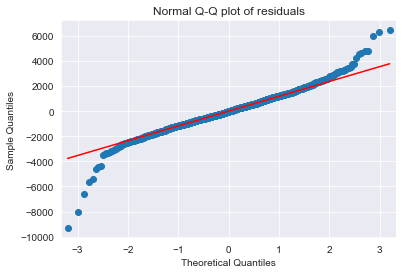

In [31]:
# 2) Residual Analysis 
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line = 'q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [32]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [33]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [34]:
# Test for Homoscedasticity or Heteroscedasticity

def standard_values(svals) : return (svals - svals.mean())/svals.std()

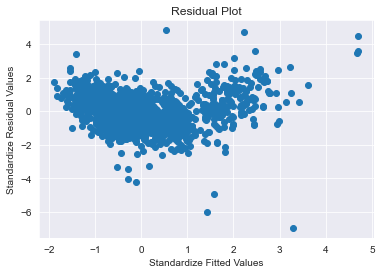

In [35]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardize Fitted Values')
plt.ylabel('Standardize Residual Values')
plt.show()

eval_env: 1


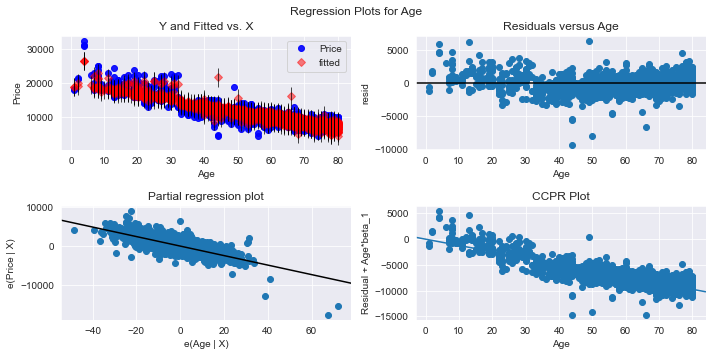

In [36]:
fig = plt.figure(figsize = (10,5))
sm.graphics.plot_regress_exog(model,'Age' , fig = fig)
plt.show()

eval_env: 1


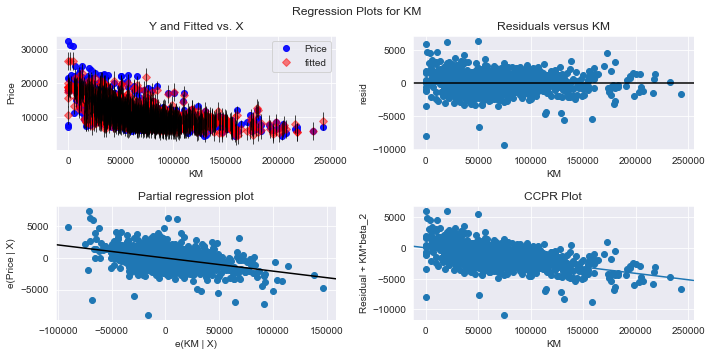

In [37]:
fig = plt.figure(figsize = (10,5))
sm.graphics.plot_regress_exog(model, 'KM',fig = fig)
plt.show()

eval_env: 1


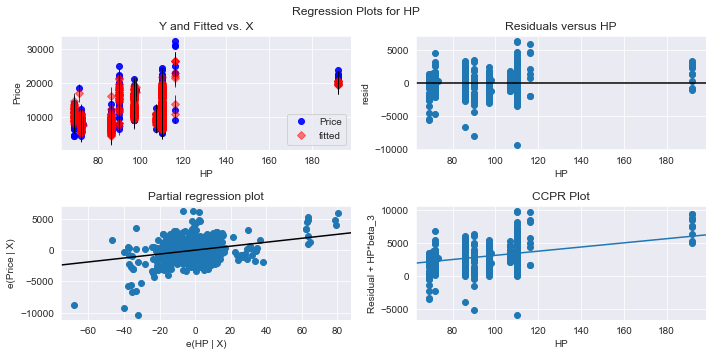

In [38]:
fig = plt.figure(figsize = (10,5))
sm.graphics.plot_regress_exog(model, 'HP',fig = fig)
plt.show()

eval_env: 1


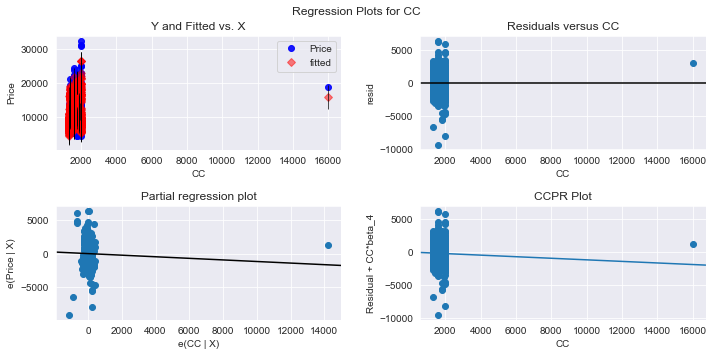

In [39]:
fig = plt.figure(figsize = (10,5))
sm.graphics.plot_regress_exog(model, 'CC',fig = fig)
plt.show()

eval_env: 1


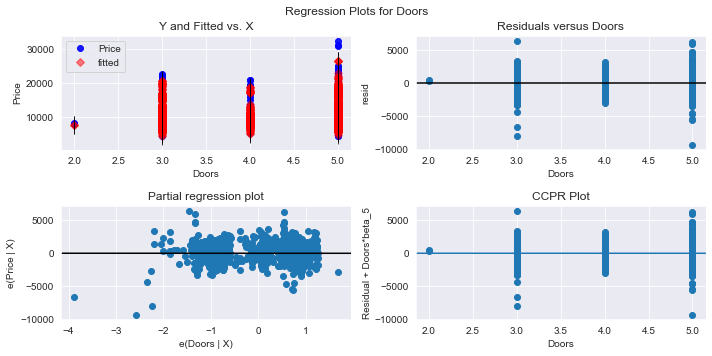

In [40]:
fig = plt.figure(figsize = (10,5))
sm.graphics.plot_regress_exog(model, 'Doors',fig = fig)
plt.show()

eval_env: 1


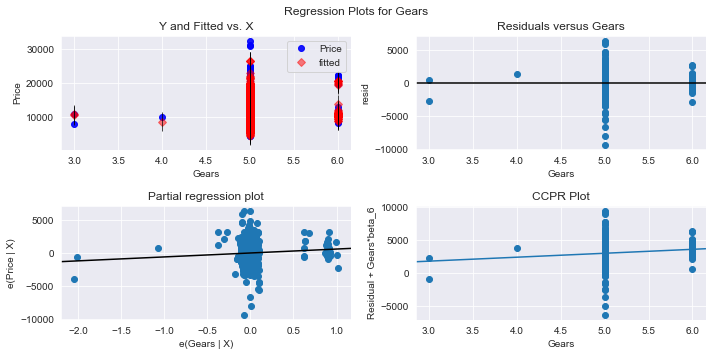

In [41]:
fig = plt.figure(figsize = (10,5))
sm.graphics.plot_regress_exog(model, 'Gears',fig = fig)
plt.show()

eval_env: 1


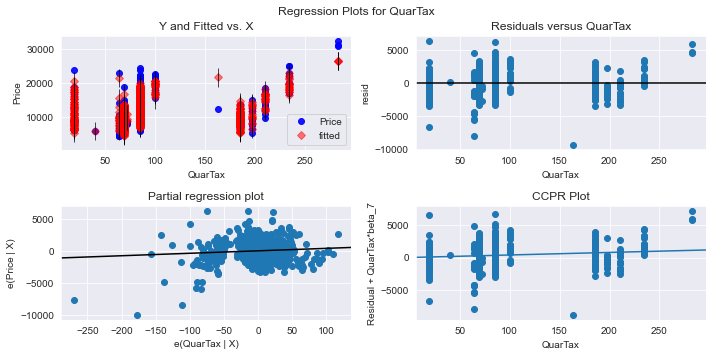

In [42]:
fig = plt.figure(figsize = (10,5))
sm.graphics.plot_regress_exog(model, 'QuarTax',fig = fig)
plt.show()

eval_env: 1


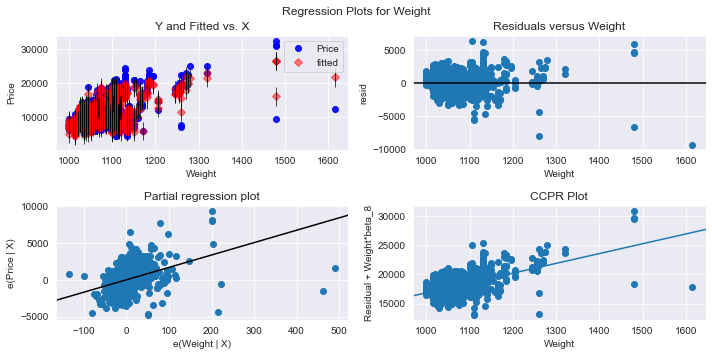

In [43]:
fig = plt.figure(figsize = (10,5))
sm.graphics.plot_regress_exog(model, 'Weight',fig = fig)
plt.show()

## Model Deletion Diagnostics
#### Two Techniques : 1) Cook's Distance & 2) Leverage Value

In [44]:
(c,_) = model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

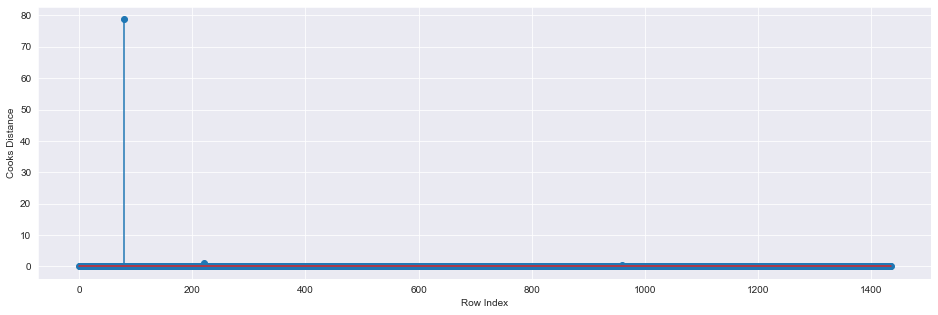

In [45]:
# Plot the Influencers Using the stem Plot
fig = plt.figure(figsize =(16,5))
plt.stem(np.arange(len(Toyota3)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [46]:
# Index and Value of Influencer 
np.argmax(c) , np.max(c)

(80, 78.72950582248232)

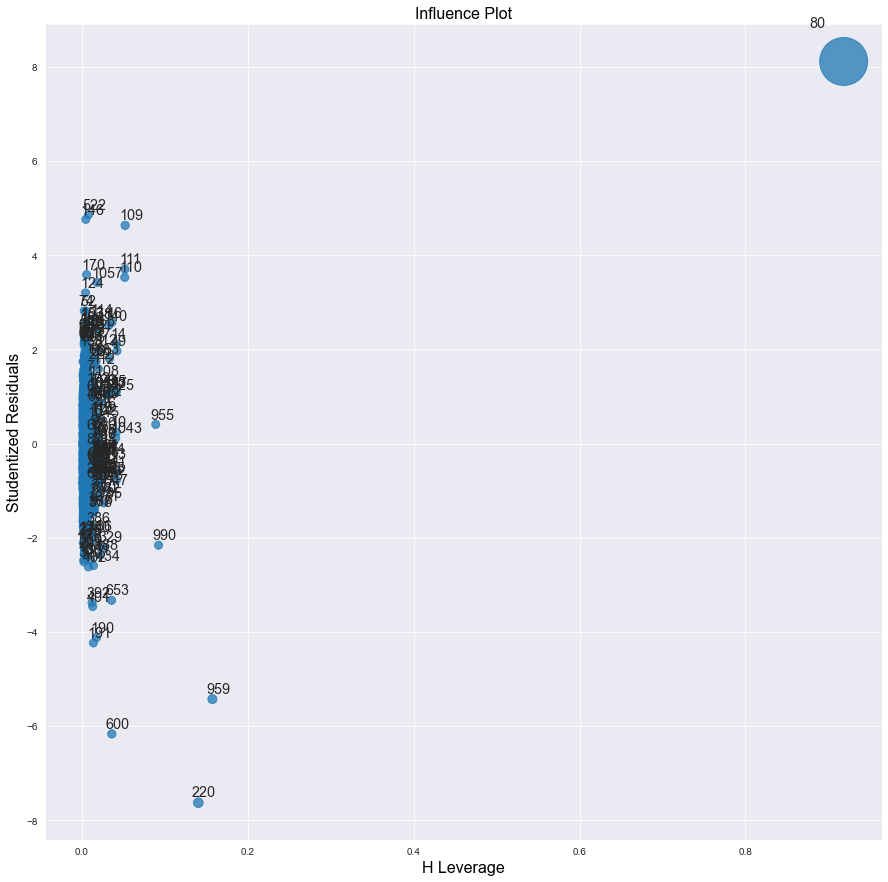

In [47]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

fig, ax = plt.subplots(figsize = (15,15))
fig = influence_plot(model,ax = ax)
plt.show()

In [48]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k = Toyota3.shape[1]
n = Toyota3.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [49]:
Toyota3[Toyota3.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QuarTax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


### Improving Model 

In [50]:
Toyota4 = Toyota3.drop(Toyota3.index[[80]],axis = 0).reset_index(drop = True)
Toyota4

,Price,Age,KM,HP,CC,Doors,Gears,QuarTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


### Model Deletion Diagnostics and Final Model 

In [51]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model = smf.ols('Price ~ Age +  KM + HP + CC + Doors + Gears + QuarTax + Weight ',data = Toyota4).fit()
        (c,_) = model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        Toyota4 = Toyota4.drop(Toyota4.index[[np.argmax(c)]],axis = 0).reset_index(drop = True)
        Toyota4
    else:
        final_model = smf.ols('Price ~ Age +  KM + HP + CC + Doors + Gears + QuarTax + Weight',data = Toyota4).fit()
        final_model.rsquared , final_model.aic
        print("Model Accuracy is Improved to",final_model.rsquared)

Model Accuracy is Improved to 0.8765926307402282
Model Accuracy is Improved to 0.8839684606741538
Model Accuracy is Improved to 0.8882395145171204
Model Accuracy is Improved to 0.8902571486612915
Model Accuracy is Improved to 0.8909888960319987
Model Accuracy is Improved to 0.8922595280462808
Model Accuracy is Improved to 0.8933621011392295
Model Accuracy is Improved to 0.8947147371605556
Model Accuracy is Improved to 0.8955233405057648
Model Accuracy is Improved to 0.8930210061069088
Model Accuracy is Improved to 0.8939546425147169
Model Accuracy is Improved to 0.8954112430715817
Model Accuracy is Improved to 0.8960182592139027
Model Accuracy is Improved to 0.8968403506948497
Model Accuracy is Improved to 0.8964026771830705
Model Accuracy is Improved to 0.8958538146890626
Model Accuracy is Improved to 0.8953750500147551
Model Accuracy is Improved to 0.8949455651565241
Model Accuracy is Improved to 0.8960864004304144
Model Accuracy is Improved to 0.8955820765034093
Model Accuracy is Im

In [52]:
final_model.rsquared

0.9003762532318558

In [53]:
Toyota4

,Price,Age,KM,HP,CC,Doors,Gears,QuarTax,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245
...,...,...,...,...,...,...,...,...,...
1325,8450,80,23000,86,1300,3,5,69,1015
1326,7500,69,20544,86,1300,3,5,69,1025
1327,10845,72,19000,86,1300,3,5,69,1015
1328,8500,71,17016,86,1300,3,5,69,1015


### Model Prediction 

In [64]:
Newdata = pd.DataFrame({"Age": 12 ,"KM": 40000 ,"HP": 80 ,"CC": 1300 ,"Doors": 4 ,"Gears": 5 ,"QuarTax": 69,"Weight": 1012},index = [0])
Newdata

,Age,KM,HP,CC,Doors,Gears,QuarTax,Weight
0,12,40000,80,1300,4,5,69,1012


In [61]:
# Manual Prediction 
Pred = final_model.predict(Newdata)
Pred

0    14398.815471
dtype: float64

In [62]:
# Automatics Prediction 
pred_y = final_model.predict(Toyota4)
pred_y

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64